In [42]:
import pandas as pd
import seaborn as sns

In [43]:
benchmark = pd.read_csv('15-benchmark.csv')
benchmark.insert(1, 'Path Present', benchmark['Path Length'] != 0, True)
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            100 non-null    object 
 1   Path Present         100 non-null    bool   
 2   Path Length          100 non-null    int64  
 3   Path Weight          100 non-null    float64
 4   Duration (µs)        100 non-null    float64
 5   Visited Vertices     100 non-null    int64  
 6   Average Degree       100 non-null    float64
 7   Average Path Degree  100 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 5.7+ KB


In [44]:
benchmark_path = benchmark[benchmark['Path Present']]
benchmark_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            100 non-null    object 
 1   Path Present         100 non-null    bool   
 2   Path Length          100 non-null    int64  
 3   Path Weight          100 non-null    float64
 4   Duration (µs)        100 non-null    float64
 5   Visited Vertices     100 non-null    int64  
 6   Average Degree       100 non-null    float64
 7   Average Path Degree  100 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 5.7+ KB


In [45]:
benchmark_nopath = benchmark[benchmark['Path Present'] == False]
benchmark_nopath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            0 non-null      object 
 1   Path Present         0 non-null      bool   
 2   Path Length          0 non-null      int64  
 3   Path Weight          0 non-null      float64
 4   Duration (µs)        0 non-null      float64
 5   Visited Vertices     0 non-null      int64  
 6   Average Degree       0 non-null      float64
 7   Average Path Degree  0 non-null      float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 0.0+ bytes


# Duration of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Duration (µs)'>

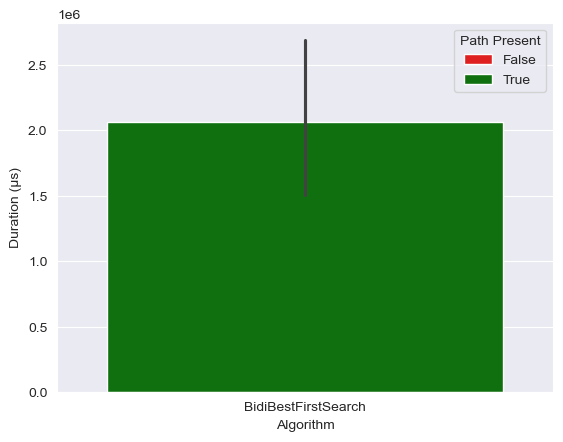

In [46]:
sns.barplot(benchmark, x='Algorithm', y='Duration (µs)', hue='Path Present', hue_order=[False, True], palette=['red', 'green'])

# Visit counts of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Visited Vertices'>

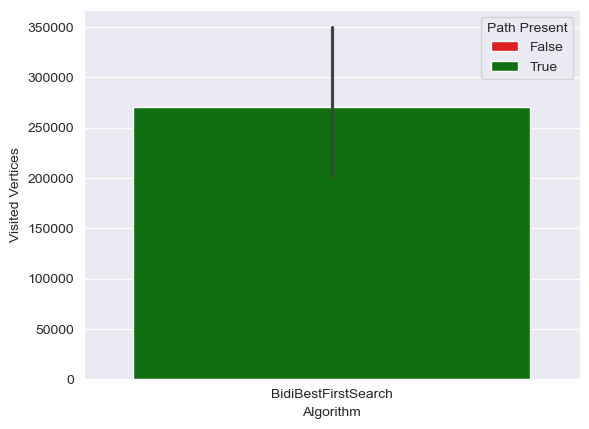

In [47]:
sns.barplot(benchmark, x='Algorithm', y='Visited Vertices', hue='Path Present', hue_order=[False, True], palette=['red', 'green'])

# Relationship between algorithm and path length

<Axes: xlabel='Algorithm', ylabel='Path Length'>

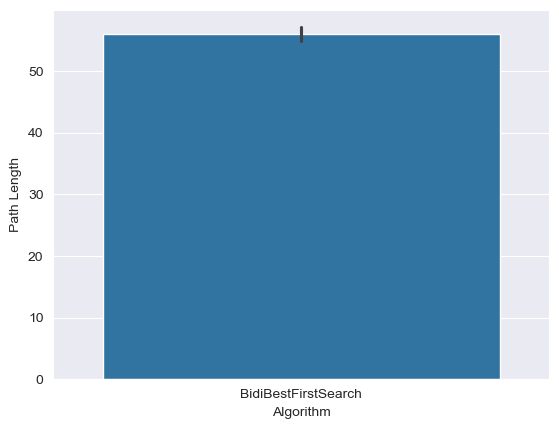

In [48]:
sns.barplot(benchmark, x='Algorithm', y='Path Length')

# Relationship between algorithm and path weight

<Axes: xlabel='Algorithm', ylabel='Path Weight'>

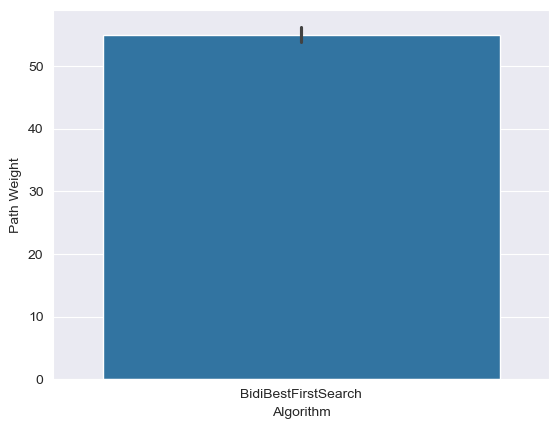

In [49]:
sns.barplot(benchmark, x='Algorithm', y='Path Weight')

# Relationship between visit count and duration

<Axes: xlabel='Visited Vertices', ylabel='Duration (µs)'>

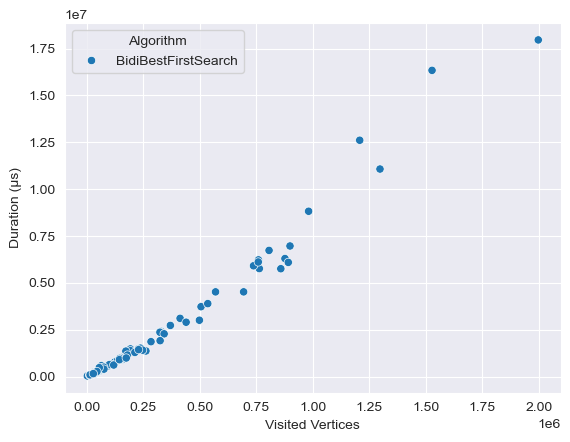

In [69]:
sns.scatterplot(benchmark, x='Visited Vertices', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and visit count

<Axes: xlabel='Path Length', ylabel='Visited Vertices'>

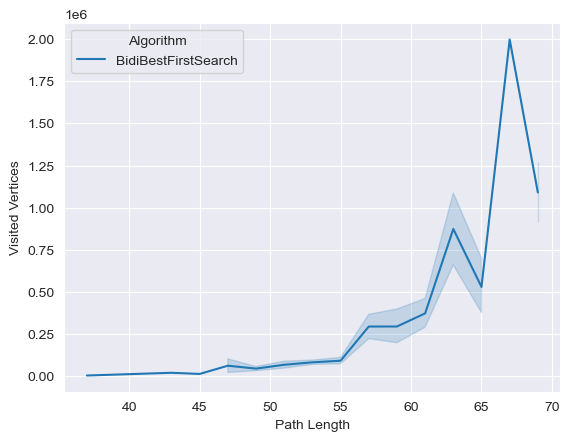

In [52]:
sns.lineplot(benchmark_path, x='Path Length', y='Visited Vertices', hue='Algorithm', errorbar=('ci', 75))

# Relationship between path weight and visit count

<Axes: xlabel='Path Weight', ylabel='Visited Vertices'>

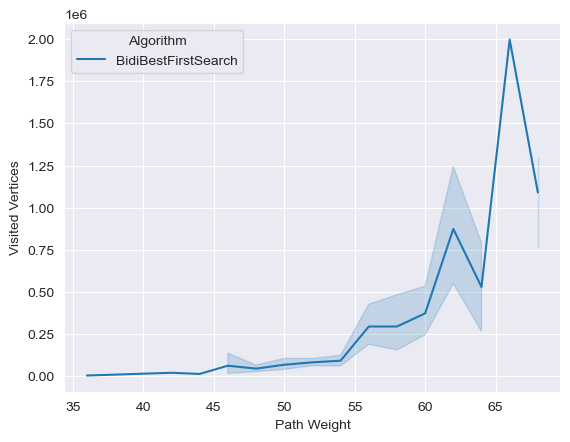

In [53]:
sns.lineplot(benchmark_path, x='Path Weight', y='Visited Vertices', hue='Algorithm')

# Relationship between path length and duration

<Axes: xlabel='Path Length', ylabel='Duration (µs)'>

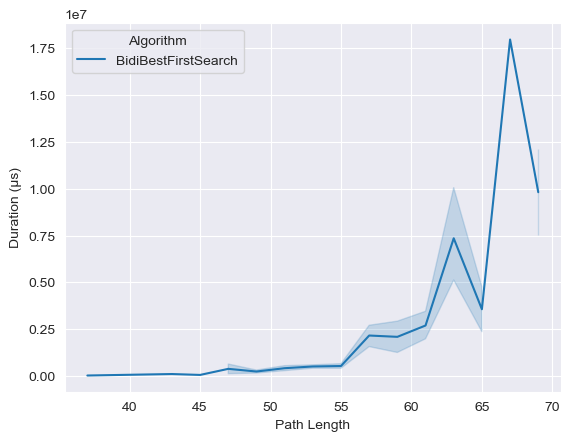

In [54]:
sns.lineplot(benchmark_path, x='Path Length', y='Duration (µs)', hue='Algorithm', errorbar=('ci', 75))

# Relationship between path weight and duration

<Axes: xlabel='Path Weight', ylabel='Duration (µs)'>

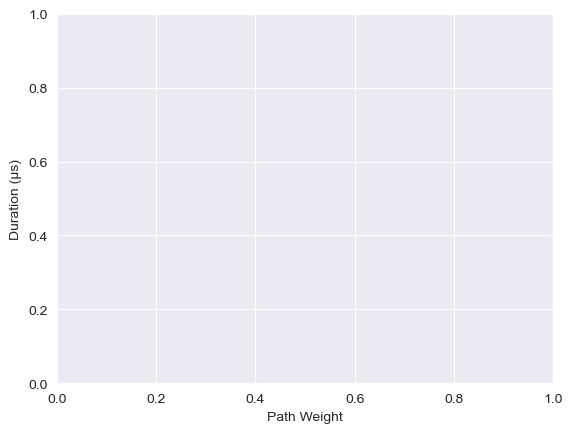

In [55]:
sns.lineplot(benchmark_path[benchmark_path['Duration (µs)'] < 5000], x='Path Weight', y='Duration (µs)', hue='Algorithm')

# Relationship between average degree and visit count

<Axes: xlabel='Average Path Degree', ylabel='Visited Vertices'>

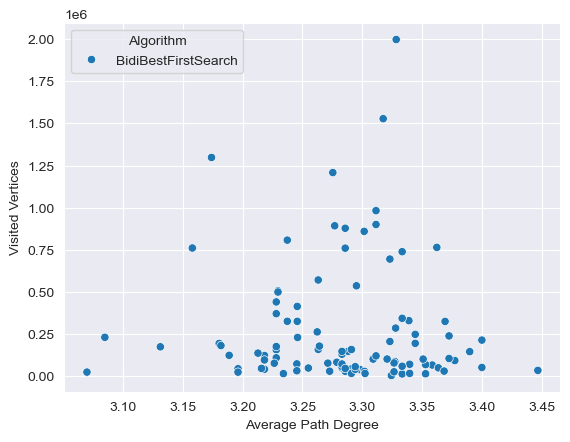

In [56]:
sns.scatterplot(benchmark, x='Average Path Degree', y='Visited Vertices', hue='Algorithm')

# Relationship between average degree and duration

<Axes: xlabel='Average Degree', ylabel='Duration (µs)'>

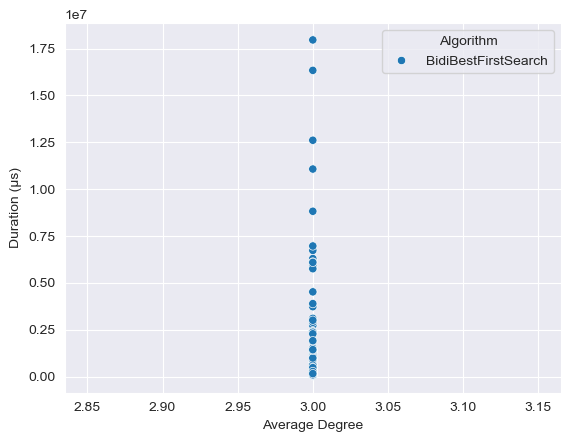

In [57]:
sns.scatterplot(benchmark, x='Average Degree', y='Duration (µs)', hue='Algorithm')

<Axes: >

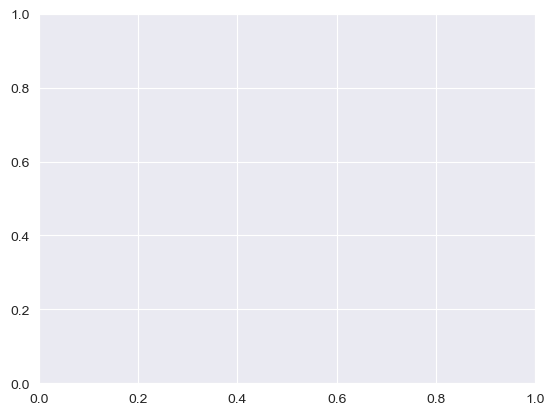

In [58]:
sns.scatterplot(benchmark[benchmark['Duration (µs)'] < 2000], x='Average Degree', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and average degree

<Axes: xlabel='Path Length', ylabel='Average Degree'>

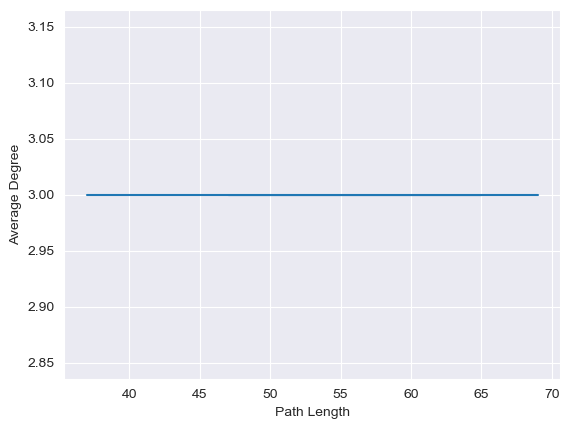

In [59]:
sns.lineplot(benchmark, x='Path Length', y='Average Degree')

# Relationship between path length and average path degree

<Axes: xlabel='Path Length', ylabel='Average Path Degree'>

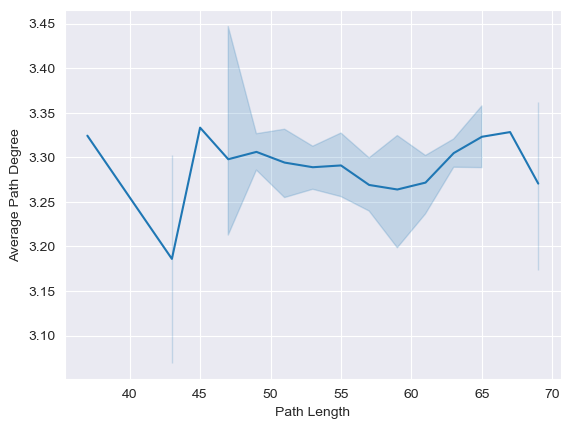

In [60]:
sns.lineplot(benchmark, x='Path Length', y='Average Path Degree')

# Distribution of durations for each algorithm

<Axes: xlabel='Duration (µs)', ylabel='Count'>

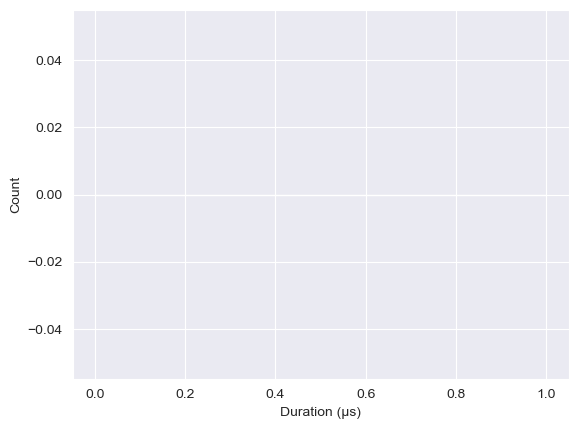

In [65]:
sns.histplot(benchmark[benchmark['Duration (µs)'] < 1500], x='Duration (µs)', hue='Algorithm')

# Distribution of visited vertices for each algorithm

<Axes: xlabel='Visited Vertices', ylabel='Count'>

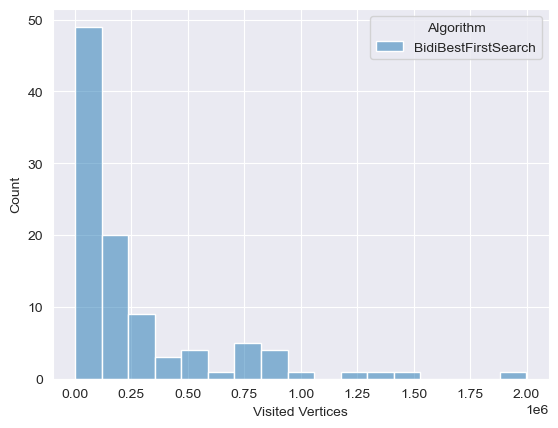

In [66]:
sns.histplot(benchmark, x='Visited Vertices', hue='Algorithm')

# Correlation Heatmap

<Axes: >

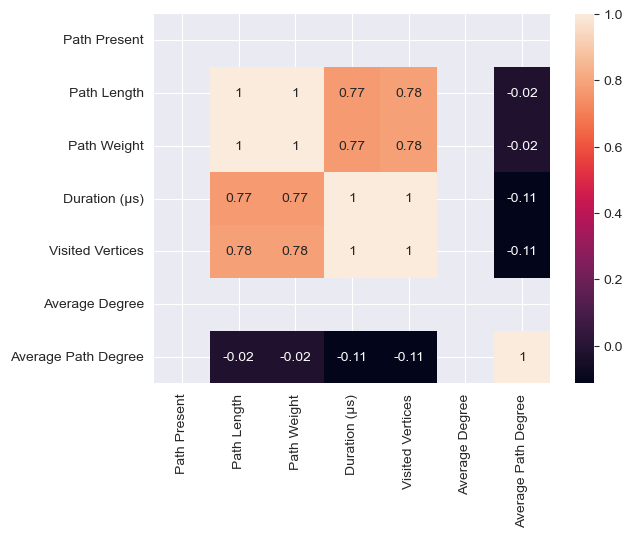

In [67]:
sns.heatmap(benchmark.corr(method='spearman', numeric_only=True), annot=True)